In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#Step 1: Load the Dataset

Why: We need to inspect the dataset structure and understand available features.

In [2]:
# read Dataset

from google.colab import drive
drive.mount('/content/drive')

file_path_carica = "/content/drive/My Drive/Colab Notebooks/DataDriven/Project/cibo_birra_dataset_completo.csv"

# Load the CSV in a DataFrame
df = pd.read_csv(file_path_carica)
df

#df['Tipo di birra'].value_counts()

Mounted at /content/drive


,Età,Grado di alcol,Tipo di birra,Colore,Gusto,Corpo/consistenza,Carbonatazione,Origine
0,46.024063,10.592527,Saison,Ambrata,Speziato,Media,Alta,Belga
1,46.661259,9.542904,Saison,Ambrata,Speziato,Media,Alta,Belga
2,18.392517,4.184634,IPA,Ambrata,Amara,Media,Media,Americana
3,56.076007,11.021312,Bock,Ambrata,Dolce,Piena,Media,Tedesca
4,39.243649,5.577746,Lager,Chiara,Bilanciato,Leggera,Alta,Tedesca
...,...,...,...,...,...,...,...,...
995,47.918071,9.696456,Amber Ale,Ambrata,Caramellato,Media,Media,Americana
996,20.521942,4.296985,IPA,Ambrata,Amara,Media,Media,Americana
997,49.962365,9.103302,Amber Ale,Ambrata,Caramellato,Media,Media,Americana
998,64.028343,10.620382,Barleywine,Sconosciuto,Sconosciuto,Sconosciuto,Sconosciuto,Sconosciuto


##Vedere i valori unici di ogni colonna

In [3]:
def visualizza_valori_unici(dataset):
    """
    Visualizza i valori unici per ogni colonna di un DataFrame, escludendo le colonne specificate.

    :param dataset: DataFrame pandas contenente i dati.
    :param colonne_da_escludere: Lista di colonne da escludere (opzionale).
    """
    colonne_da_escludere = ['Età', 'Grado di alcol']  # Sostituisci con i nomi delle colonne che vuoi escludere

    if colonne_da_escludere:
        # Rimuove le colonne da escludere
        dataset = dataset.drop(columns=colonne_da_escludere)

    # Crea un dizionario per i valori unici
    valori_unici = {}

    # Estrae e visualizza i valori unici per ogni colonna
    for colonna in dataset.columns:
        valori_unici[colonna] = dataset[colonna].unique()

    # Stampa i risultati in un formato leggibile
    for colonna, valori in valori_unici.items():
        print(f"\nColonna: {colonna}")
        print("Valori unici:")
        for valore in valori:
            print(f" - {valore}")

visualizza_valori_unici(df)


Colonna: Tipo di birra
Valori unici:
 - Saison
 - IPA
 - Bock
 - Lager
 - Amber Ale
 - Pilsner
 - Stout
 - Porter
 - Wheat Beer
 - Barleywine

Colonna: Colore
Valori unici:
 - Ambrata
 - Chiara
 - Scura
 - Sconosciuto

Colonna: Gusto
Valori unici:
 - Speziato
 - Amara
 - Dolce
 - Bilanciato
 - Caramellato
 - Amaro
 - Tostato
 - Sconosciuto

Colonna: Corpo/consistenza
Valori unici:
 - Media
 - Piena
 - Leggera
 - Sconosciuto

Colonna: Carbonatazione
Valori unici:
 - Alta
 - Media
 - Bassa
 - Sconosciuto

Colonna: Origine
Valori unici:
 - Belga
 - Americana
 - Tedesca
 - Irlandese
 - Inglese
 - Sconosciuto


##Vedere le righe che hanno valore sconosiuto

In [4]:
def mostra_righe_con_sconosciuto(dataset, valore="Sconosciuto"):
    """
    Mostra le righe in cui almeno una colonna contiene il valore specificato.

    :param dataset: DataFrame pandas contenente i dati.
    :param valore: Il valore da cercare nelle colonne (default "Sconosciuto").
    """
    # Trova tutte le righe che contengono il valore specificato in almeno una colonna
    righe_filtrate = dataset[dataset.applymap(lambda x: x == valore).any(axis=1)]

    # Se ci sono righe corrispondenti, mostrale
    if not righe_filtrate.empty:
        print(f"\nRighe con il valore '{valore}' in almeno una colonna:")
        print(righe_filtrate)
    else:
        print(f"\nNessuna riga trovata con il valore '{valore}' in nessuna colonna.")
mostra_righe_con_sconosciuto(df)


Righe con il valore 'Sconosciuto' in almeno una colonna:
           Età  Grado di alcol Tipo di birra       Colore        Gusto  \
12   25.698223        3.393485    Wheat Beer  Sconosciuto  Sconosciuto   
15   65.521122       12.000000    Barleywine  Sconosciuto  Sconosciuto   
35   25.076822        3.000000    Wheat Beer  Sconosciuto  Sconosciuto   
46   24.348582        3.000000    Wheat Beer  Sconosciuto  Sconosciuto   
48   26.317394        3.197600    Wheat Beer  Sconosciuto  Sconosciuto   
..         ...             ...           ...          ...          ...   
986  24.826928        3.015579    Wheat Beer  Sconosciuto  Sconosciuto   
990  65.621572       11.630390    Barleywine  Sconosciuto  Sconosciuto   
992  64.788870       11.012820    Barleywine  Sconosciuto  Sconosciuto   
994  26.384273        3.563909    Wheat Beer  Sconosciuto  Sconosciuto   
998  64.028343       10.620382    Barleywine  Sconosciuto  Sconosciuto   

    Corpo/consistenza Carbonatazione      Origine  
1

<ipython-input-4-7159ee6d29f3>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  righe_filtrate = dataset[dataset.applymap(lambda x: x == valore).any(axis=1)]


#Step 2: Data Cleaning and Encoding

Why:

	•	We need to format numeric features properly for compatibility with machine learning models.
	•	The target variable “Tipo di birra” needs to be encoded as numbers.
	•	Since we found a lot of Unknown values we need to handle them by dropping them

In [5]:
# Data cleaning and preprocessing

# Data Cleaning
df.replace("Sconosciuto", pd.NA, inplace=True)
df.dropna(inplace=True)


# Convert 'Età' to integer and round 'Grado di alcol'
df['Età'] = df['Età'].round(2)
df['Grado di alcol'] = df['Grado di alcol'].round(1)

# Move the label 'Tipo di birra' to the last column
columns_order = [col for col in df.columns if col != 'Tipo di birra'] + ['Tipo di birra']
df = df[columns_order]

# Encode the target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Tipo di birra'])

# Define features (inputs)
X = df.drop(columns=['Tipo di birra'])

# Reset index and drop the old index
df.reset_index(drop=True, inplace=True)

# Display cleaned data summary
df.describe()

print(y_encoded)


df

[6 6 2 1 3 3 1 0 4 1 7 5 5 5 0 5 6 3 3 3 3 5 5 7 7 1 6 5 4 1 7 6 0 3 0 6 3
 6 5 5 4 3 2 0 0 2 2 4 4 7 1 1 4 4 4 6 5 7 7 7 3 2 6 4 2 4 7 0 1 4 0 2 4 7
 0 2 3 1 2 2 4 3 0 5 7 0 7 4 1 6 0 3 3 6 4 6 7 1 6 0 3 4 2 5 4 2 6 5 4 7 3
 6 7 5 0 4 2 4 1 2 1 6 7 4 0 7 5 3 1 7 4 7 2 3 0 3 6 3 3 2 1 1 3 1 2 2 4 1
 7 6 4 0 0 4 4 1 5 3 7 3 2 3 1 0 1 1 4 4 7 4 7 4 1 4 7 7 3 0 6 7 2 3 3 1 1
 6 0 6 5 1 4 1 6 5 7 3 3 5 3 4 7 5 3 0 4 3 0 7 5 0 0 4 6 3 6 5 7 0 2 6 3 5
 0 1 4 0 3 2 2 1 3 0 2 1 4 6 2 6 0 5 1 2 6 0 3 6 6 6 0 5 4 7 1 1 1 2 5 2 7
 0 6 0 1 7 5 5 4 1 4 1 2 0 5 2 7 2 7 2 2 3 0 3 1 0 1 4 0 5 4 3 3 1 2 2 5 7
 1 6 6 7 5 6 2 5 2 4 0 0 3 2 2 1 3 1 5 7 7 6 2 1 4 1 5 7 1 0 2 3 2 3 7 4 5
 1 1 7 6 2 6 6 6 6 2 6 1 2 3 4 3 6 5 1 6 0 3 2 6 6 0 2 0 0 7 3 4 4 6 5 4 7
 0 0 1 1 5 4 3 4 2 5 1 0 7 0 1 3 0 2 5 7 6 7 1 6 5 6 6 6 3 6 7 0 3 0 2 0 3
 1 6 7 6 4 5 0 2 4 6 2 4 4 7 7 4 2 3 3 0 6 3 4 4 7 7 0 3 6 0 2 7 4 4 5 1 5
 7 3 2 3 5 1 7 7 2 0 3 6 2 7 0 2 2 7 5 6 0 4 0 7 4 3 1 0 7 5 7 6 3 6 6 1 6
 2 7 2 4 4 0 4 2 5 1 5 3 

,Età,Grado di alcol,Colore,Gusto,Corpo/consistenza,Carbonatazione,Origine,Tipo di birra
0,46.02,10.6,Ambrata,Speziato,Media,Alta,Belga,Saison
1,46.66,9.5,Ambrata,Speziato,Media,Alta,Belga,Saison
2,18.39,4.2,Ambrata,Amara,Media,Media,Americana,IPA
3,56.08,11.0,Ambrata,Dolce,Piena,Media,Tedesca,Bock
4,39.24,5.6,Chiara,Bilanciato,Leggera,Alta,Tedesca,Lager
...,...,...,...,...,...,...,...,...
795,44.97,11.8,Ambrata,Speziato,Media,Alta,Belga,Saison
796,47.92,9.7,Ambrata,Caramellato,Media,Media,Americana,Amber Ale
797,20.52,4.3,Ambrata,Amara,Media,Media,Americana,IPA
798,49.96,9.1,Ambrata,Caramellato,Media,Media,Americana,Amber Ale


##Features check

In [6]:
mostra_righe_con_sconosciuto(df)
visualizza_valori_unici(df)


Nessuna riga trovata con il valore 'Sconosciuto' in nessuna colonna.

Colonna: Colore
Valori unici:
 - Ambrata
 - Chiara
 - Scura

Colonna: Gusto
Valori unici:
 - Speziato
 - Amara
 - Dolce
 - Bilanciato
 - Caramellato
 - Amaro
 - Tostato

Colonna: Corpo/consistenza
Valori unici:
 - Media
 - Piena
 - Leggera

Colonna: Carbonatazione
Valori unici:
 - Alta
 - Media
 - Bassa

Colonna: Origine
Valori unici:
 - Belga
 - Americana
 - Tedesca
 - Irlandese
 - Inglese

Colonna: Tipo di birra
Valori unici:
 - Saison
 - IPA
 - Bock
 - Lager
 - Amber Ale
 - Pilsner
 - Stout
 - Porter


<ipython-input-4-7159ee6d29f3>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  righe_filtrate = dataset[dataset.applymap(lambda x: x == valore).any(axis=1)]


#Step 3: Check for Duplicates

Why:

    •	 Duplicate data can cause the model to overfit and reduce prediction accuracy so we handle them by dropping them.

In [7]:
# Check for duplicates
duplicates_count = df.duplicated(subset=X.columns, keep=False).sum()
print(f"Number of Duplicated Rows: {duplicates_count}")

Number of Duplicated Rows: 14


In [8]:
df.drop_duplicates(inplace=True)

<ipython-input-8-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [9]:
# Check for duplicates and features and Unknown
duplicates_count = df.duplicated(subset=X.columns, keep=False).sum()
print(f"Number of Duplicated Rows: {duplicates_count}")
mostra_righe_con_sconosciuto(df)
visualizza_valori_unici(df)

Number of Duplicated Rows: 0

Nessuna riga trovata con il valore 'Sconosciuto' in nessuna colonna.

Colonna: Colore
Valori unici:
 - Ambrata
 - Chiara
 - Scura

Colonna: Gusto
Valori unici:
 - Speziato
 - Amara
 - Dolce
 - Bilanciato
 - Caramellato
 - Amaro
 - Tostato

Colonna: Corpo/consistenza
Valori unici:
 - Media
 - Piena
 - Leggera

Colonna: Carbonatazione
Valori unici:
 - Alta
 - Media
 - Bassa

Colonna: Origine
Valori unici:
 - Belga
 - Americana
 - Tedesca
 - Irlandese
 - Inglese

Colonna: Tipo di birra
Valori unici:
 - Saison
 - IPA
 - Bock
 - Lager
 - Amber Ale
 - Pilsner
 - Stout
 - Porter


<ipython-input-4-7159ee6d29f3>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  righe_filtrate = dataset[dataset.applymap(lambda x: x == valore).any(axis=1)]


##Step 4 : Verify the number of samples for each class, perform a PCA (distribution plot showing all beer types), and assess the importance of each feature using the correlation matrix and Chi-2 test.

1. We Verify the Number of Samples for Each Class:


    •	To check for class imbalance.
    •	If one class has significantly fewer samples than others, the model may struggle to predict that class accurately.
    •	Identifies the need for techniques like oversampling (e.g., SMOTE) or undersampling.


2. We Perform PCA (Principal Component Analysis):


	•	To reduce the dataset’s dimensionality while retaining the most significant variance.
	•	Helps visualize the distribution of classes in a lower-dimensional space (e.g., 2D plot).
	•	Identifies patterns or separations among different classes (beer types).
	•	Useful for detecting overlapping classes or clusters.

3. We Assess Feature Importance Using the Correlation Matrix:


	•	To understand how features relate to each other.
	•	Identifies strong correlations between features, which may indicate redundancy.
	•	Helps with feature selection by identifying irrelevant or highly correlated features that might not add value to the model.

4. We Assess Feature Importance Using the Chi-2 Test:  


	•	Measures the statistical dependence between each feature and the target variable.
	•	Identifies which features have the strongest influence on the target.
	•	Helps rank features by their importance, guiding feature selection and prioritization.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Funzione 1: Distribuzione delle classi
def plot_class_distribution(df, target_column='Tipo di birra'):
    """
    Visualizza la distribuzione delle classi nel dataset.
    """
    plt.figure(figsize=(8, 6))
    df[target_column].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Distribuzione delle classi per tipo di birra")
    plt.xlabel("Tipo di birra")
    plt.ylabel("Numero di campioni")
    plt.xticks(rotation=45)
    plt.show()

    # Mostrare il numero di campioni per ogni classe
    class_counts = df[target_column].value_counts()
    print("Numero di campioni per ogni tipo di birra:")
    for beer_type, count in class_counts.items():
        print(f"{beer_type}: {count}")

# Funzione 2: PCA (Principal Component Analysis)
def plot_pca(X, y, n_components=2):
    """
    Applica PCA sui dati e visualizza il grafico delle componenti principali.
    """
    # Usa pd.get_dummies per convertire le variabili categoriali in numeriche
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Applica PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_encoded)

    # Grafico PCA
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
    plt.colorbar(scatter, label="Tipo di birra (codificato)")
    plt.title("Distribuzione PCA per tipo di birra")
    plt.xlabel("Componente Principale 1")
    plt.ylabel("Componente Principale 2")
    plt.show()

# Funzione 3: Importanza delle feature usando il test Chi-2
def chi2_feature_importance(X, y, categorical_columns):
    """
    Esegue il test Chi-2 per valutare l'importanza delle feature categoriali.
    """
    # Applica Label Encoding alle feature categoriali
    X_chi2 = X.copy()
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        X_chi2[col] = le.fit_transform(X_chi2[col])
        label_encoders[col] = le

    # Esegui il test Chi-2
    chi2_values, p_values = chi2(X_chi2, y)

    # Crea una tabella con i risultati
    chi2_results = pd.DataFrame({
        'Feature': X_chi2.columns,
        'Chi2 Score': chi2_values,
        'P-Value': p_values
    }).sort_values(by='Chi2 Score', ascending=False)

    # Stampa i risultati del test Chi-2
    print("Risultati del test Chi-2 (importanza delle feature):")
    print(chi2_results)

# Funzione 4: Matrice di correlazione delle feature
def plot_correlation_matrix(X, categorical_columns):
    """
    Visualizza la matrice di correlazione delle feature.
    """
    # Usa il dataset con Label Encoding per calcolare la matrice di correlazione
    X_chi2 = X.copy()
    for col in categorical_columns:
        le = LabelEncoder()
        X_chi2[col] = le.fit_transform(X_chi2[col])

    plt.figure(figsize=(10, 8))
    sns.heatmap(X_chi2.corr(), annot=True, cmap='coolwarm', cbar=True)
    plt.title("Matrice di correlazione delle feature originali")
    plt.show()

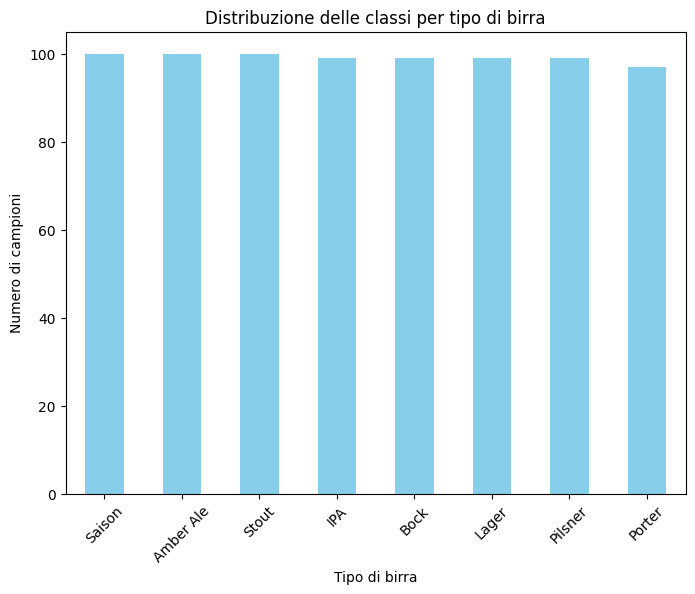

Numero di campioni per ogni tipo di birra:
Saison: 100
Amber Ale: 100
Stout: 100
IPA: 99
Bock: 99
Lager: 99
Pilsner: 99
Porter: 97


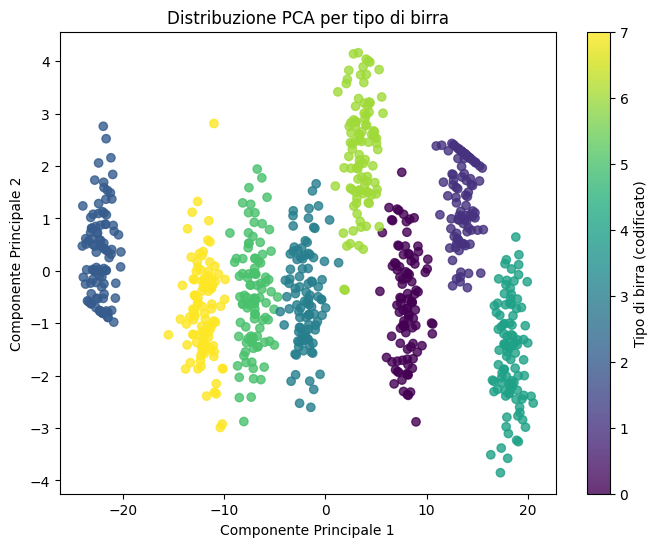

Risultati del test Chi-2 (importanza delle feature):
             Feature   Chi2 Score        P-Value
0                Età  2993.724396   0.000000e+00
3              Gusto  1062.962963  2.983412e-225
6            Origine   955.555556  4.814042e-202
2             Colore   733.333333  4.474613e-154
5     Carbonatazione   611.111111  9.854027e-128
1     Grado di alcol   561.166410  5.581017e-117
4  Corpo/consistenza   433.333333   1.681834e-89


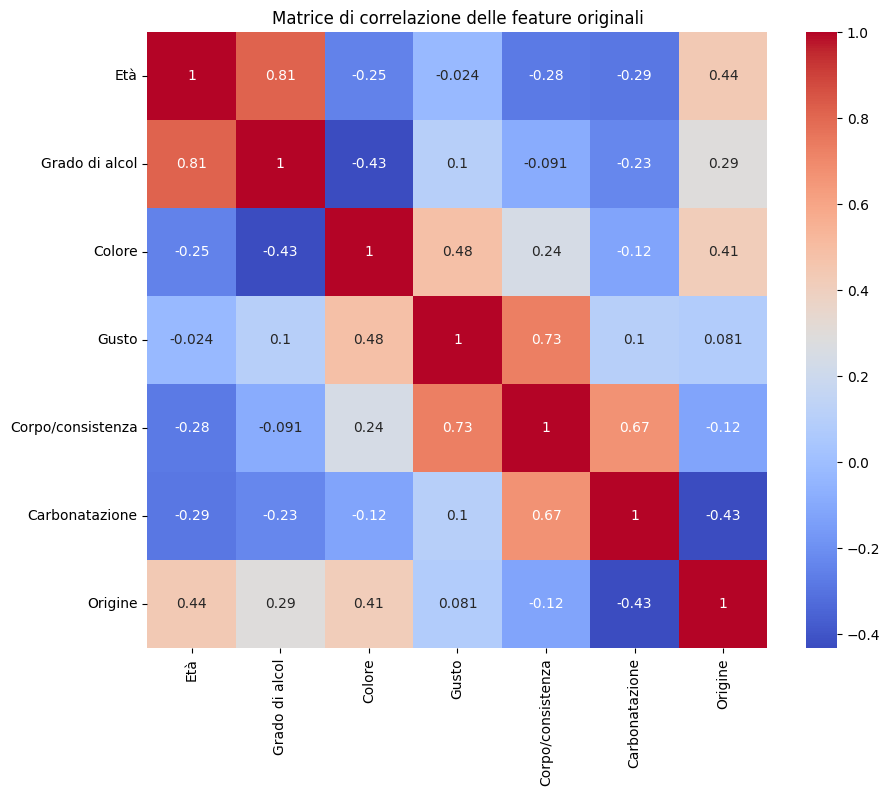

In [11]:
# Per visualizzare la distribuzione delle classi:
plot_class_distribution(df)

# Per applicare la PCA e visualizzare il grafico:
plot_pca(X, y_encoded)

# Per eseguire il test Chi-2 e ottenere l'importanza delle feature:
chi2_feature_importance(X, y_encoded, ['Colore', 'Gusto', 'Corpo/consistenza', 'Carbonatazione', 'Origine'])

# Per visualizzare la matrice di correlazione delle feature:
plot_correlation_matrix(X, ['Colore', 'Gusto', 'Corpo/consistenza', 'Carbonatazione', 'Origine'])

##Step 5 Observation and analysis:

1. Distribution of Classes

Observations:

	•	The bar chart shows that the dataset is nearly balanced, with most beer types having approximately 100 samples.
	•	The counts indicate that:
	•	Classes like Saison, Amber Ale, and Stout are fully balanced with 100 samples each.
	•	Some minor imbalance exists (IPA, Bock, Lager, Pilsner, and Porter) with slightly fewer samples.

Insights:

	•	A balanced dataset is ideal for classification models since no specific class will dominate the training process.
	•	The slight imbalance is negligible and does not necessitate immediate action like oversampling or undersampling.


2. PCA (Principal Component Analysis)

Observations:

	•	The PCA scatter plot shows the distribution of beer types based on the first two principal components.
	•	Classes are spread out, but some overlap exists, indicating that the beer types might share similar feature distributions.
	•	The variance captured by these two components is significant but not perfect, as there are still overlaps.

Insights:

	•	PCA confirms that the dataset has meaningful variability, but some features might not strongly separate the beer types.
	•	The overlaps suggest the need for robust classifiers (e.g., Random Forest, Support Vector Machines) to handle potential ambiguities between similar classes.
	•	Consider increasing the number of PCA components to explain more variance if needed for visualization or dimensionality reduction.



3. Feature Importance via Chi-2

Observations:

From the Chi-2 results:

	•	Most Important Features:
	•	Età (Chi2 Score: ~2993) has the highest impact on beer type classification.
	•	Gusto and Origine also have high scores, indicating strong relevance.
	•	Least Important Feature:
	•	Corpo/consistenza has the lowest Chi2 Score (~433).

Insights:

	•	Features like Età, Gusto, and Origine should be prioritized when building models, as they contribute the most to classifying beer types.
	•	Corpo/consistenza has less predictive power, but it might still add value when combined with other features.
	•	Use the Chi-2 results to consider feature selection if computational efficiency is a concern.


 4. Correlation Matrix

Observations:

	•	Età and Grado di alcol have a strong positive correlation (0.81), indicating potential redundancy.
	•	Gusto and Corpo/consistenza are moderately correlated (0.73), suggesting some dependency.
	•	Other features like Carbonatazione and Origine show weaker correlations, indicating that they provide independent information.

Insights:

	•	Strongly correlated features like Età and Grado di alcol might not need to coexist in the model, as one can represent the other without significant loss of information.
	•	Features with weak correlations (e.g., Carbonatazione and Origine) are valuable as they contribute unique information to the model.

Overall Recommendations

1.Feature Selection:

	•	Focus on Età, Gusto, and Origine based on the Chi-2 test.
	•	Consider removing one of the highly correlated features (Età or Grado di alcol) if dimensionality reduction is required.

2.Model Selection:

	•	Since the dataset is balanced and features show meaningful variability, classification models like Logistic Regression, Random Forest, or Decision Trees can work well.
	•	Random Forest might perform best due to its ability to handle interactions between features.
3.Dimensionality Reduction:

	•	PCA with more components (e.g., 3 or 4) could be tested to capture more variance if visualization isn’t the primary goal.
4.Next Steps:

	•	Train initial models using all features, then perform feature selection (based on Chi-2 or correlation analysis) to optimize performance.
	•	Evaluate the impact of reducing correlated features on model accuracy.

In [12]:
df

,Età,Grado di alcol,Colore,Gusto,Corpo/consistenza,Carbonatazione,Origine,Tipo di birra
0,46.02,10.6,Ambrata,Speziato,Media,Alta,Belga,Saison
1,46.66,9.5,Ambrata,Speziato,Media,Alta,Belga,Saison
2,18.39,4.2,Ambrata,Amara,Media,Media,Americana,IPA
3,56.08,11.0,Ambrata,Dolce,Piena,Media,Tedesca,Bock
4,39.24,5.6,Chiara,Bilanciato,Leggera,Alta,Tedesca,Lager
...,...,...,...,...,...,...,...,...
795,44.97,11.8,Ambrata,Speziato,Media,Alta,Belga,Saison
796,47.92,9.7,Ambrata,Caramellato,Media,Media,Americana,Amber Ale
797,20.52,4.3,Ambrata,Amara,Media,Media,Americana,IPA
798,49.96,9.1,Ambrata,Caramellato,Media,Media,Americana,Amber Ale


#Step 4: Data Augmentation (if needed)

Why:

    1. Imbalanced Classes
	•	Check for class imbalance: If some beer types have significantly fewer samples than others, you may benefit from data augmentation to balance the dataset. For example:
	•	Oversample minority classes (e.g., using SMOTE or random oversampling).
	•	Undersample majority classes (not data augmentation but can help balance).



    2. Dataset Size
	•	Small dataset: If the overall dataset size is small, augmentation can help improve model generalization.
	•	Large dataset: If you already have a large dataset, data augmentation might not be necessary unless you’re targeting specific issues (e.g., overfitting).


    3. Feature Types
	•	Categorical Features: Augmentation for categorical data is more challenging and often requires methods like oversampling or SMOTE.
	•	Numerical Features: Features with continuous values can benefit from slight perturbations (e.g., noise, scaling, or transformation).


    4. Task Type
	•	Image Data: Data augmentation is common and often essential (e.g., flipping, rotating, or scaling images).
	•	Tabular Data (like your dataset): Augmentation is less common but can include:
	•	Oversampling minority classes.
	•	Adding noise or transformations to numerical features.
	•	Text Data: Techniques include back-translation, synonym replacement, or paraphrasing.


    5. Overfitting
	•	Signs of Overfitting: If your model performs well on training data but poorly on validation/test data, data augmentation can help introduce variability and prevent overfitting.
	•	No Overfitting: If your model generalizes well, augmentation might not be necessary.


    6. Computational Resources
	•	Limited Resources: Augmentation can increase computational requirements, especially during training.
	•	Adequate Resources: If resources are sufficient, augmentation can help improve performance.


    7. Data Diversity
	•	High Diversity: If your dataset already captures the variability of the real-world problem, augmentation might not add value.
	•	Low Diversity: If your dataset lacks variation (e.g., similar data points, missing edge cases), augmentation can improve performance.


How to decide ?

	1.	Check Class Distribution:

	•	Imbalanced? Yes, you need augmentation.


	2.	Evaluate Dataset Size:

	•	Small dataset? Yes, you likely need augmentation.


	3.	Look at Model Performance:

	•	Overfitting? Yes, augmentation might help.


	4.	Assess Data Diversity:

	•	Homogeneous data? Yes, augmentation can increase variation.

Key Takeaway

    You need data augmentation if:
    
	•	Your dataset is small or lacks diversity.
	•	You have imbalanced classes.
	•	Your model is overfitting to the training data.


In [28]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Funzione per verificare se il dataset è sbilanciato
def check_imbalance(y, threshold=0.05):  # Soglia molto più bassa (5%) per una maggiore sensibilità
    y = pd.Series(y)  # Converti in pandas Series
    class_counts = y.value_counts()
    min_class = min(class_counts)
    max_class = max(class_counts)

    # Confronto diretto tra la classe più piccola e quella più grande
    if (max_class - min_class) / max_class > threshold:
        return True  # Sbilanciamento significativo
    else:
        return False  # No sbilanciamento

# Verifica se il dataset è sbilanciato
if check_imbalance(y_encoded):
    augmented_df = X.copy()

    # Gestisci NaN o valori non numerici nella colonna 'Età' prima di applicare l'augmentation
    augmented_df['Età'] = pd.to_numeric(augmented_df['Età'], errors='coerce')  # Converte in numerico, sostituendo non numerici con NaN
    augmented_df['Età'] = augmented_df['Età'].fillna(30)  # Sostituisce NaN con un valore predefinito (30)

    # Augmenta le feature numeriche con i nuovi limiti per 'Età' (18 - 70)
    augmented_df['Età'] = np.random.normal(augmented_df['Età'], 5)
    augmented_df['Età'] = augmented_df['Età'].clip(lower=18, upper=70).astype(int)

    # Gestisci la colonna 'Grado di alcol' allo stesso modo
    augmented_df['Grado di alcol'] = pd.to_numeric(augmented_df['Grado di alcol'], errors='coerce')
    augmented_df['Grado di alcol'] = augmented_df['Grado di alcol'].fillna(7.5)
    augmented_df['Grado di alcol'] = (augmented_df['Grado di alcol'] + np.random.uniform(-2.0, 2.0, size=len(augmented_df))).round(1).clip(lower=0.0, upper=15.0)

    # Mescola le feature categoriche
    categorical_features = ['Colore', 'Gusto', 'Corpo/consistenza', 'Carbonatazione', 'Origine']
    for col in categorical_features:
        augmented_df[col] = np.random.permutation(augmented_df[col].values)

    # Gestisce il class imbalance con SMOTE (richiede dati numerici, quindi usa encoding temporaneo)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(pd.get_dummies(augmented_df), y_encoded)

    # Decodifica le variabili categoriche per mantenere il dataset "completo"
    X_augmented = pd.DataFrame(X_smote, columns=pd.get_dummies(augmented_df).columns)
    y_augmented = y_smote

    # In caso di necessità, mappa indietro le variabili categoriche
    for col in categorical_features:
        original_categories = augmented_df[col].unique()
        category_mapping = {i: cat for i, cat in enumerate(original_categories)}
        X_augmented[col] = X_augmented[[f"{col}_{cat}" for cat in original_categories]].idxmax(axis=1).str.split("_").str[-1]

    # Elimina le colonne di encoding temporanee
    X_augmented = X_augmented[categorical_features + ['Età', 'Grado di alcol']]

    # Ripristina l'ordine delle colonne originali
    X_augmented = X_augmented[augmented_df.columns]  # Ripristina l'ordine delle colonne

    # Controlla i duplicati dopo l'augmentation
    duplicates_after_aug = X_augmented.duplicated(keep=False).sum()
    print(f"Number of Duplicated Rows after Augmentation: {duplicates_after_aug}")

else:
    X_augmented = X.copy()
    y_augmented = y_encoded
    print("No augmentation needed.")

# Reintegra la variabile target nel dataset finale
augmented_df = X_augmented.copy()
augmented_df['Tipo di birra'] = label_encoder.inverse_transform(y_augmented)

# Mostra il dataset finale in modo chiaro (decodifica le categorie se necessario)
import IPython.display as display
display.display(augmented_df)  # Mostra l'intero dataframe in modo leggibile
mostra_righe_con_sconosciuto(augmented_df)
visualizza_valori_unici(augmented_df)

No augmentation needed.


,Età,Grado di alcol,Colore,Gusto,Corpo/consistenza,Carbonatazione,Origine,Tipo di birra
0,46.02,10.6,Ambrata,Speziato,Media,Alta,Belga,Saison
1,46.66,9.5,Ambrata,Speziato,Media,Alta,Belga,Saison
2,18.39,4.2,Ambrata,Amara,Media,Media,Americana,IPA
3,56.08,11.0,Ambrata,Dolce,Piena,Media,Tedesca,Bock
4,39.24,5.6,Chiara,Bilanciato,Leggera,Alta,Tedesca,Lager
...,...,...,...,...,...,...,...,...
795,44.97,11.8,Ambrata,Speziato,Media,Alta,Belga,Saison
796,47.92,9.7,Ambrata,Caramellato,Media,Media,Americana,Amber Ale
797,20.52,4.3,Ambrata,Amara,Media,Media,Americana,IPA
798,49.96,9.1,Ambrata,Caramellato,Media,Media,Americana,Amber Ale



Nessuna riga trovata con il valore 'Sconosciuto' in nessuna colonna.

Colonna: Colore
Valori unici:
 - Ambrata
 - Chiara
 - Scura

Colonna: Gusto
Valori unici:
 - Speziato
 - Amara
 - Dolce
 - Bilanciato
 - Caramellato
 - Amaro
 - Tostato

Colonna: Corpo/consistenza
Valori unici:
 - Media
 - Piena
 - Leggera

Colonna: Carbonatazione
Valori unici:
 - Alta
 - Media
 - Bassa

Colonna: Origine
Valori unici:
 - Belga
 - Americana
 - Tedesca
 - Irlandese
 - Inglese

Colonna: Tipo di birra
Valori unici:
 - Saison
 - IPA
 - Bock
 - Lager
 - Amber Ale
 - Pilsner
 - Stout
 - Porter


<ipython-input-4-7159ee6d29f3>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  righe_filtrate = dataset[dataset.applymap(lambda x: x == valore).any(axis=1)]


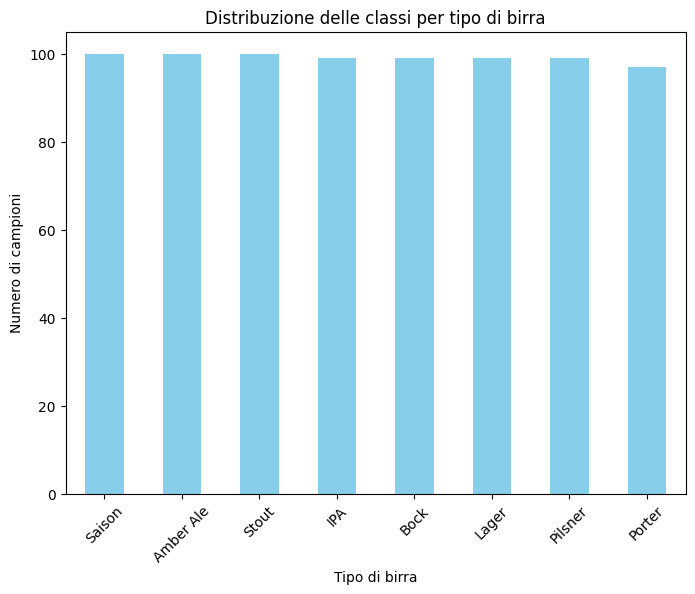

Numero di campioni per ogni tipo di birra:
Saison: 100
Amber Ale: 100
Stout: 100
IPA: 99
Bock: 99
Lager: 99
Pilsner: 99
Porter: 97


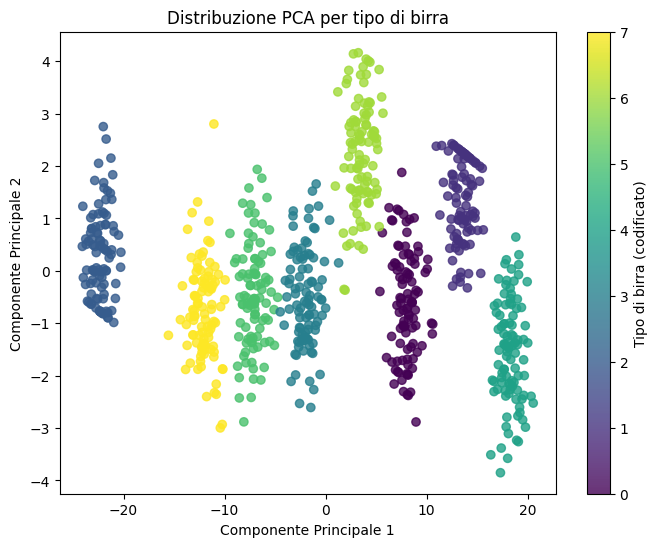

Risultati del test Chi-2 (importanza delle feature):
             Feature   Chi2 Score        P-Value
0                Età  2965.938776   0.000000e+00
3              Gusto  1051.655327  8.289827e-223
6            Origine   950.334456  6.461318e-201
2             Colore   728.773649  4.306506e-153
5     Carbonatazione   606.898876  7.958001e-127
1     Grado di alcol   554.223777  1.741081e-115
4  Corpo/consistenza   428.886644   1.514337e-88


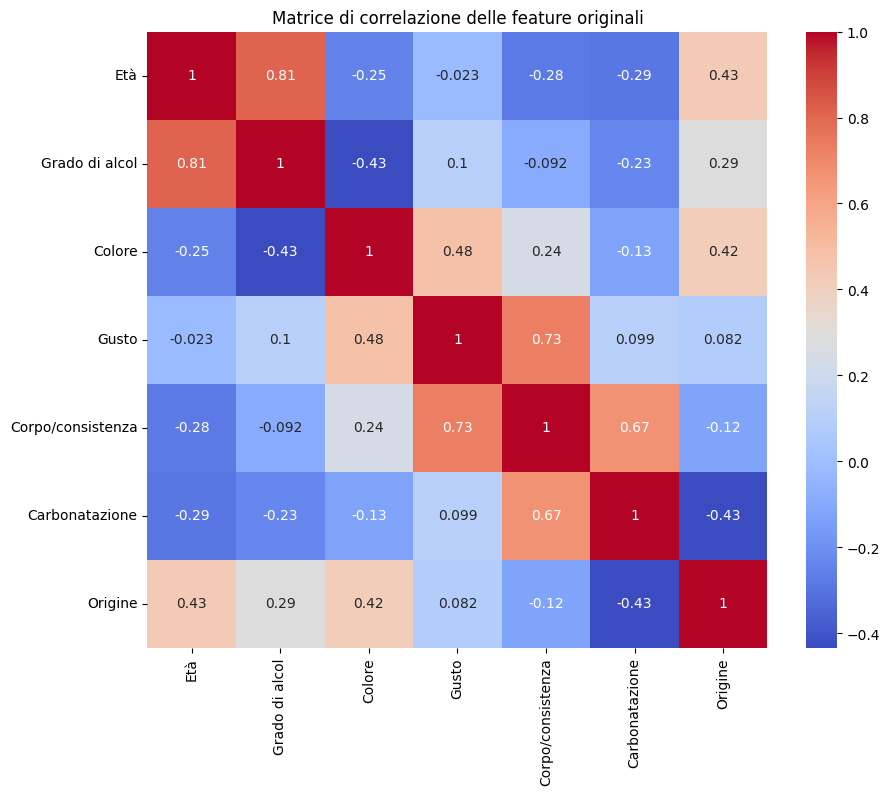

In [29]:
# Per visualizzare la distribuzione delle classi:
plot_class_distribution(augmented_df)

# Per applicare la PCA e visualizzare il grafico:
plot_pca(X_augmented, y_augmented)

# Per eseguire il test Chi-2 e ottenere l'importanza delle feature:
chi2_feature_importance(X_augmented, y_augmented, ['Colore', 'Gusto', 'Corpo/consistenza', 'Carbonatazione', 'Origine'])

# Per visualizzare la matrice di correlazione delle feature:
plot_correlation_matrix(X_augmented, ['Colore', 'Gusto', 'Corpo/consistenza', 'Carbonatazione', 'Origine'])

##Step 6: Data Preparation for training the models.

Model used are :

    . Logistic regression
    . Random Forest
    . Decision Tree


We’ll split the data into training and test sets and encode the categorical features appropriately for each model.    

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features (X) and target (y)
X = augmented_df.drop(columns=['Tipo di birra'])
y = augmented_df['Tipo di birra']


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)



[6 6 2 1 3 3 1 0 4 1 7 5 5 5 0 5 6 3 3 3 3 5 5 7 7 1 6 5 4 1 7 6 0 3 0 6 3
 6 5 5 4 3 2 0 0 2 2 4 4 7 1 1 4 4 4 6 5 7 7 7 3 2 6 4 2 4 7 0 1 4 0 2 4 7
 0 2 3 1 2 2 4 3 0 5 7 0 7 4 1 6 0 3 3 6 4 6 7 1 6 0 3 4 2 5 4 2 6 5 4 7 3
 6 7 5 0 4 2 4 1 2 1 6 7 4 0 7 5 3 1 7 4 7 2 3 0 3 6 3 3 2 1 1 3 1 2 2 4 1
 7 6 4 0 0 4 4 1 5 3 7 3 2 3 1 0 1 1 4 4 7 4 7 4 1 4 7 7 3 0 6 7 2 3 3 1 1
 6 0 6 5 1 4 1 6 5 7 3 3 5 3 4 7 5 3 0 4 3 0 7 5 0 0 4 6 3 6 5 7 0 2 6 3 5
 0 1 4 0 3 2 2 1 3 0 2 1 4 6 2 6 0 5 1 2 6 0 3 6 6 6 0 5 4 7 1 1 1 2 5 2 7
 0 6 0 1 7 5 5 4 1 4 1 2 0 5 2 7 2 7 2 2 3 0 3 1 0 1 4 0 5 4 3 3 1 2 2 5 7
 1 6 6 7 5 6 2 5 2 4 0 0 3 2 2 1 3 1 5 7 7 6 2 1 4 1 5 7 1 0 2 3 2 3 7 4 5
 1 7 6 2 6 6 6 6 2 6 1 2 3 4 3 6 5 1 6 0 3 2 6 6 0 2 0 0 7 3 4 4 6 5 4 7 0
 0 1 1 5 4 3 4 2 5 1 0 7 0 1 3 0 2 5 7 6 7 1 6 5 6 6 6 3 6 7 0 3 0 2 0 3 1
 6 7 6 4 5 0 2 4 6 2 4 4 7 7 4 2 3 3 0 6 3 4 4 7 7 0 3 6 0 2 7 4 5 1 5 7 3
 2 3 5 1 7 7 2 0 3 6 2 7 0 2 2 7 5 6 0 4 0 7 4 3 1 0 7 5 7 6 3 6 6 1 6 2 7
 2 4 4 0 4 2 5 1 5 3 3 3 

##Step 7 : Model Training and Evaluation

For each model, we will:

	1.	Train the model on the training set.
	2.	Evaluate its performance on the test set using accuracy and other metrics.


##Step 7.1 : Logistic Regression



In [32]:
from sklearn.linear_model import LogisticRegression

# Convert categorical features to One-Hot Encoding for Logistic Regression
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Ensure the test set has the same columns as the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_encoded, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_encoded)

# Evaluation
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(classification_report(y_test, y_pred_log_reg, target_names=label_encoder.classes_))

Logistic Regression Performance:
Accuracy: 1.00
              precision    recall  f1-score   support

   Amber Ale       1.00      1.00      1.00        20
        Bock       1.00      1.00      1.00        20
         IPA       1.00      1.00      1.00        20
       Lager       1.00      1.00      1.00        20
     Pilsner       1.00      1.00      1.00        20
      Porter       1.00      1.00      1.00        19
      Saison       1.00      1.00      1.00        20
       Stout       1.00      1.00      1.00        20

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



##Step 7.2 : Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Label Encode the categorical features for Decision Tree
X_train_label_encoded = X_train.copy()
X_test_label_encoded = X_test.copy()

label_encoders = {}
for col in ['Colore', 'Gusto', 'Corpo/consistenza', 'Carbonatazione', 'Origine']:
    le = LabelEncoder()
    X_train_label_encoded[col] = le.fit_transform(X_train[col])
    X_test_label_encoded[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_label_encoded, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_label_encoded)

# Evaluation
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

Decision Tree Performance:
Accuracy: 1.00
              precision    recall  f1-score   support

   Amber Ale       1.00      1.00      1.00        20
        Bock       1.00      1.00      1.00        20
         IPA       1.00      1.00      1.00        20
       Lager       1.00      1.00      1.00        20
     Pilsner       1.00      1.00      1.00        20
      Porter       1.00      1.00      1.00        19
      Saison       1.00      1.00      1.00        20
       Stout       1.00      1.00      1.00        20

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



##Step 7.3 : Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_label_encoded, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_label_encoded)

# Evaluation
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Random Forest Performance:
Accuracy: 1.00
              precision    recall  f1-score   support

   Amber Ale       1.00      1.00      1.00        20
        Bock       1.00      1.00      1.00        20
         IPA       1.00      1.00      1.00        20
       Lager       1.00      1.00      1.00        20
     Pilsner       1.00      1.00      1.00        20
      Porter       1.00      1.00      1.00        19
      Saison       1.00      1.00      1.00        20
       Stout       1.00      1.00      1.00        20

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



## Step 8 : Compairing the models

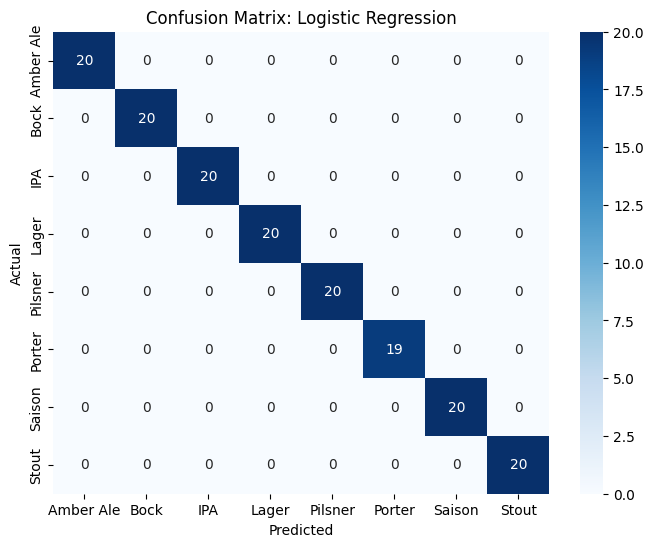

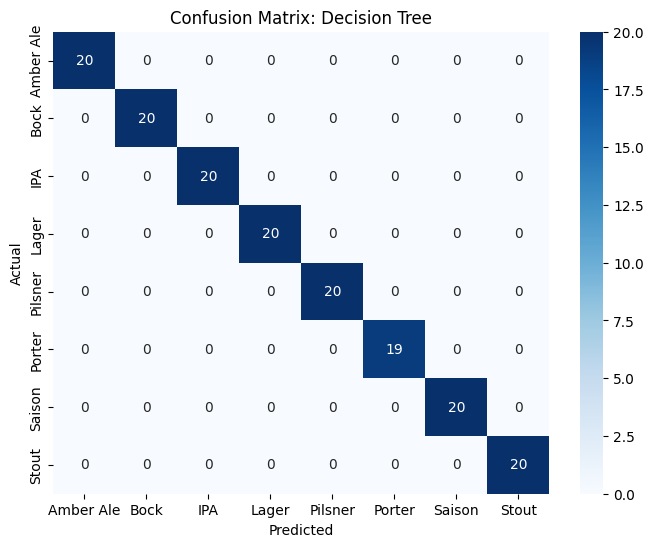

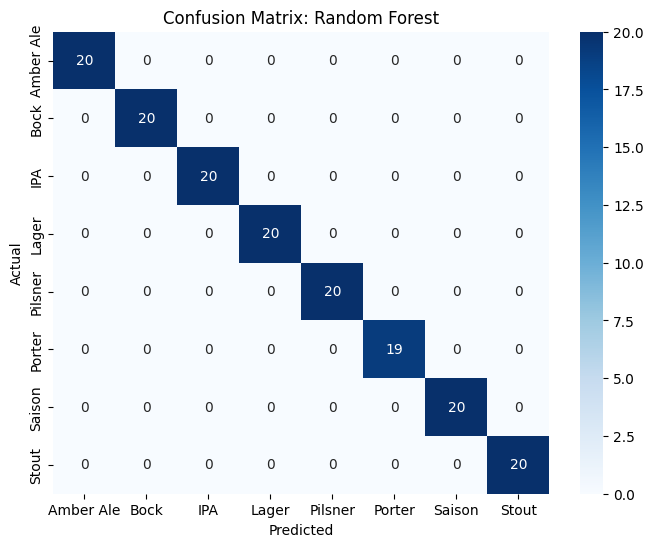

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

#Step 8.1 : Compairing report

From the results provided, all three models—Logistic Regression, Decision Tree, and Random Forest—achieve perfect performance, as indicated by:

	•	Accuracy: 100% for all models.
	•	Precision, Recall, and F1-Score: All are 1.00 across all classes.
	•	Confusion Matrices: No misclassifications in any model; all predictions match the actual labels.


Comparison of the Models :

1. Logistic Regression:


	• Advantages:
              - Simple and interpretable: Coefficients directly indicate the impact of features.
              - Computationally efficient: Faster to train and evaluate, especially on larger datasets.
              - Suitable for linearly separable data.
	• Limitations:
              - Assumes linear relationships between features and the target variable, which might not always hold true.
              - May struggle with complex, non-linear patterns.

2. Decision Tree:


	• Advantages:
              - Easy to interpret and visualize: The tree structure provides clear decision-making rules.
              - Captures non-linear relationships and interactions between features.
              - Handles both categorical and numerical data without preprocessing.
	• Limitations:
              - Prone to overfitting: Decision Trees can memorize the training data, leading to overly complex trees.


3. Random Forest:


	• Advantages:
              - Robust to overfitting: Combines multiple decision trees to improve generalization.
              - Captures complex patterns: Handles non-linear interactions and feature importance naturally.
              - Works well with high-dimensional data and noisy datasets.
	• Limitations:
              - Less interpretable than a single Decision Tree or Logistic Regression.
              - Computationally more expensive than Logistic Regression and Decision Tree.
              

#Step 9 : Select the Best Model:

Based on the evaluation metrics we noticed that :        

All three models provide perfect accuracy, in this case, ***Random Forest*** is the recommended model for the following reasons:

	1. Robustness and Generalization:

				- Random Forest is less prone to overfitting compared to a single Decision Tree.
				- Even if your dataset changes or new data is introduced, Random Forest will likely maintain high performance.

	2. Feature Importance:

				- Random Forest naturally provides feature importance scores, helping you understand which features drive predictions.

	3. Non-Linearity:

				- If there are complex relationships in the data, Random Forest will capture them better than Logistic Regression.

## Step 10 : Finalize the Model ( Random Forest )

Retrain the Random Forest model using the entire dataset (training + test set) to maximize its learning.


In [39]:
# Combine training and test sets for final training
X_final = pd.concat([X_train, X_test])
y_final = pd.concat([pd.Series(y_train), pd.Series(y_test)])

# Encode categorical features for Random Forest
X_final_encoded = X_final.copy()
for col in ['Colore', 'Gusto', 'Corpo/consistenza', 'Carbonatazione', 'Origine']:
    le = label_encoders[col]
    X_final_encoded[col] = le.transform(X_final[col])

# Retrain Random Forest model on the entire dataset
from sklearn.ensemble import RandomForestClassifier

rf_final_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final_model.fit(X_final_encoded, y_final)

print("Random Forest model retrained on the entire dataset.")



Random Forest model retrained on the entire dataset.


## Step 11 : Feature Importance Analysis

Analyze which features are most important for predicting the beer type.


Feature importances:
             Feature  Importance
0                Età    0.266831
3              Gusto    0.193914
6            Origine    0.155599
5     Carbonatazione    0.124009
4  Corpo/consistenza    0.105827
2             Colore    0.100821
1     Grado di alcol    0.053000


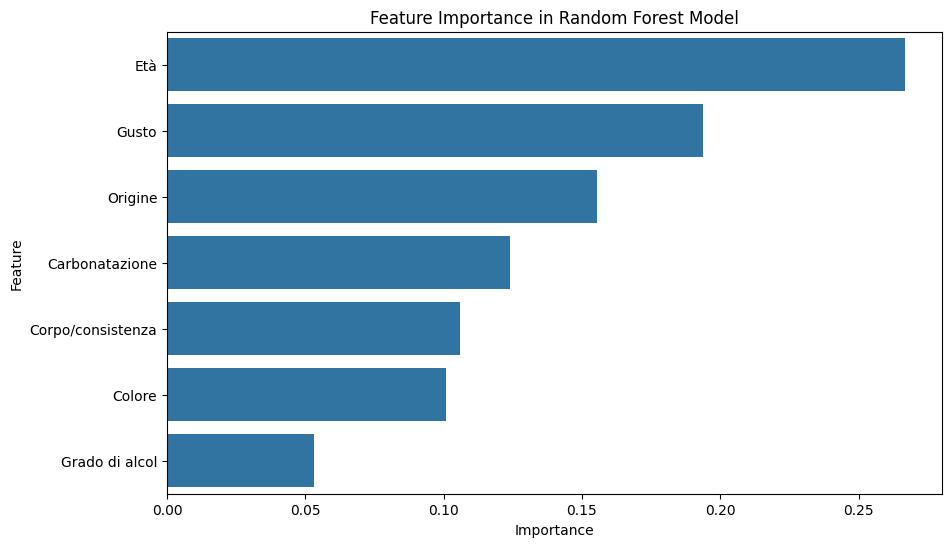

In [40]:
# Get feature importances
importances = rf_final_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X_final_encoded.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature importances:")
print(feature_importances)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance in Random Forest Model")
plt.show()

Step 12 : Save the model

Save the finalized model for deployment or future predictions.

In [42]:
import joblib

# Save the Random Forest model
joblib.dump(rf_final_model, "/content/drive/My Drive/Colab Notebooks/DataDriven/Project/Final Touch/random_forest_beer_model.pkl")
print("Random Forest model saved as 'random_forest_beer_model.pkl' in Google drive")




Random Forest model saved as 'random_forest_beer_model.pkl' in Google drive


## Step 13: Load and Predict

Use the saved model to make predictions on new data.

In [43]:
# Load the saved model
loaded_model = joblib.load("/content/drive/My Drive/Colab Notebooks/DataDriven/Project/Final Touch/random_forest_beer_model.pkl")

# Example: New data for prediction
new_data = pd.DataFrame({
    'Età': [25],
    'Grado di alcol': [5],
    'Colore': ['Chiara'],
    'Gusto': ['Caramellato'],
    'Corpo/consistenza': ['Leggera'],  # This value caused the issue
    'Carbonatazione': ['media'],
    'Origine': ['Irlandese']
})

# Handle unseen labels gracefully
new_data_encoded = new_data.copy()
for col in ['Colore', 'Gusto', 'Corpo/consistenza', 'Carbonatazione', 'Origine']:
    le = label_encoders[col]
    # Map unseen labels to the first known class (or a default class)
    new_data_encoded[col] = new_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else le.transform([le.classes_[0]])[0])

# Make predictions
prediction = loaded_model.predict(new_data_encoded)
predicted_class = label_encoder.inverse_transform(prediction)

print(f"Predicted beer type: {predicted_class[0]}")

Predicted beer type: Lager


In [44]:
augmented_df

,Età,Grado di alcol,Colore,Gusto,Corpo/consistenza,Carbonatazione,Origine,Tipo di birra
0,46.02,10.6,Ambrata,Speziato,Media,Alta,Belga,Saison
1,46.66,9.5,Ambrata,Speziato,Media,Alta,Belga,Saison
2,18.39,4.2,Ambrata,Amara,Media,Media,Americana,IPA
3,56.08,11.0,Ambrata,Dolce,Piena,Media,Tedesca,Bock
4,39.24,5.6,Chiara,Bilanciato,Leggera,Alta,Tedesca,Lager
...,...,...,...,...,...,...,...,...
795,44.97,11.8,Ambrata,Speziato,Media,Alta,Belga,Saison
796,47.92,9.7,Ambrata,Caramellato,Media,Media,Americana,Amber Ale
797,20.52,4.3,Ambrata,Amara,Media,Media,Americana,IPA
798,49.96,9.1,Ambrata,Caramellato,Media,Media,Americana,Amber Ale
